# Simulated Annealing Demo

Skrypt przedstawia przykładową implementację algorytmu symulowanego wyżarzania (ang. Simulated Annealing, SA) i jego zastosowanie do rozwiązywania problemu Quadratic Assignment Problem (QAP). Problem jest dokładnie opisany m.in. w pracy Burkarda i innych [1]. Popularne instancje problemu QAP można znaleźć w bibliotece QAPLib [2]. Skrypt skupia się na rozwiązywaniu instancji NUG12 [3], w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu.

Literatura:

[1]  Burkard, R., Cela, E., Pardalos, P., Pitsoulis, L., "The Quadratic Assignment Problem", http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.217.1914

[2] QAPLIB, http://anjos.mgi.polymtl.ca/qaplib/

[3] NUG12, http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request
import scipy.stats as stats

%matplotlib inline

In [163]:
nug = 12
QAP_INSTANCE_URL = lambda x: f'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug{x}.dat'

## Reading input data

In [164]:
def get_data(nug):
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL(nug))

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    print('Problem size: %d' % n)

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    print('Flow matrix:\n', A)

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    print('Distance matrix:\n', B)
    return A, B

A, B = get_data(nug)

Problem size: 12
Flow matrix:
 [[ 0.  1.  2.  3.  1.  2.  3.  4.  2.  3.  4.  5.]
 [ 1.  0.  1.  2.  2.  1.  2.  3.  3.  2.  3.  4.]
 [ 2.  1.  0.  1.  3.  2.  1.  2.  4.  3.  2.  3.]
 [ 3.  2.  1.  0.  4.  3.  2.  1.  5.  4.  3.  2.]
 [ 1.  2.  3.  4.  0.  1.  2.  3.  1.  2.  3.  4.]
 [ 2.  1.  2.  3.  1.  0.  1.  2.  2.  1.  2.  3.]
 [ 3.  2.  1.  2.  2.  1.  0.  1.  3.  2.  1.  2.]
 [ 4.  3.  2.  1.  3.  2.  1.  0.  4.  3.  2.  1.]
 [ 2.  3.  4.  5.  1.  2.  3.  4.  0.  1.  2.  3.]
 [ 3.  2.  3.  4.  2.  1.  2.  3.  1.  0.  1.  2.]
 [ 4.  3.  2.  3.  3.  2.  1.  2.  2.  1.  0.  1.]
 [ 5.  4.  3.  2.  4.  3.  2.  1.  3.  2.  1.  0.]]
Distance matrix:
 [[  0.   5.   2.   4.   1.   0.   0.   6.   2.   1.   1.   1.]
 [  5.   0.   3.   0.   2.   2.   2.   0.   4.   5.   0.   0.]
 [  2.   3.   0.   0.   0.   0.   0.   5.   5.   2.   2.   2.]
 [  4.   0.   0.   0.   5.   2.   2.  10.   0.   0.   5.   5.]
 [  1.   2.   0.   5.   0.  10.   0.   0.   0.   5.   1.   1.]
 [  0.   2.   0.   2.  

## Objective function

In [165]:
def qap_objective_function(p, A, B, n):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

In [166]:
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
print(qap_objective_function(p, A, B, nug), p)

578.0 [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]


## Random Sampling

In [168]:
# nug = 14
t0 = time.time()
nug = 14
A, B = get_data(nug)
T = 100000

permutations = np.empty((T, nug), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    if i%10000 == 0:
        print('.', end='')
    permutations[i, :] = np.random.permutation(nug)
    costs[i] = qap_objective_function(permutations[i, :], A, B, nug)

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(qap_objective_function(p, A, B, nug), p)

Problem size: 14
Flow matrix:
 [[ 0.  1.  2.  3.  4.  1.  2.  3.  4.  5.  2.  3.  4.  5.]
 [ 1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.  4.]
 [ 2.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.]
 [ 3.  2.  1.  0.  1.  4.  3.  2.  1.  2.  5.  4.  3.  2.]
 [ 4.  3.  2.  1.  0.  5.  4.  3.  2.  1.  6.  5.  4.  3.]
 [ 1.  2.  3.  4.  5.  0.  1.  2.  3.  4.  1.  2.  3.  4.]
 [ 2.  1.  2.  3.  4.  1.  0.  1.  2.  3.  2.  1.  2.  3.]
 [ 3.  2.  1.  2.  3.  2.  1.  0.  1.  2.  3.  2.  1.  2.]
 [ 4.  3.  2.  1.  2.  3.  2.  1.  0.  1.  4.  3.  2.  1.]
 [ 5.  4.  3.  2.  1.  4.  3.  2.  1.  0.  5.  4.  3.  2.]
 [ 2.  3.  4.  5.  6.  1.  2.  3.  4.  5.  0.  1.  2.  3.]
 [ 3.  2.  3.  4.  5.  2.  1.  2.  3.  4.  1.  0.  1.  2.]
 [ 4.  3.  2.  3.  4.  3.  2.  1.  2.  3.  2.  1.  0.  1.]
 [ 5.  4.  3.  2.  3.  4.  3.  2.  1.  2.  3.  2.  1.  0.]]
Distance matrix:
 [[  0.  10.   0.   5.   1.   0.   1.   2.   2.   2.   2.   0.   4.   0.]
 [ 10.   0.   1.   3.   2.   2.   2.   3.   2.   0.

[ 1340.  1330.  1534.  1392.  1330.  1312.  1394.  1340.  1342.  1282.]


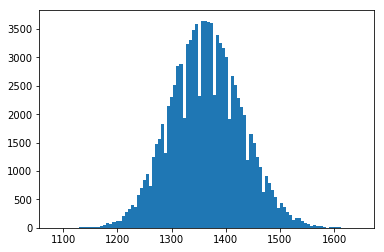

1363.8669 65.9307758516


In [169]:
print(costs[:10])
plt.figure()
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [68]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [133]:
def perm_dist(p, q):
    tau, p_value = stats.kendalltau(p, q)
    return (2-tau) * len(p)

def random_neighbor(p, radius, n):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

def simulated_annealing(T, radius, alpha, A, B, n):
    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, A, B, n)
    costs = np.zeros(T)
    successes = np.zeros(T)
    acc_fail = np.zeros(T)
    change = np.zeros((T, 2)) - 1
    for t in range(T):
        if t%10000 == 0:
            print('.', end='')
        q = random_neighbor(p, radius, n)
        q_cost = qap_objective_function(q, A, B, n)
        if(q_cost < p_cost):
            change[t,:] = np.array([(p_cost - q_cost), perm_dist(p, q)])
            p, p_cost = q, q_cost
            successes[t] = 1
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
            acc_fail[t] = 1
        costs[t] = p_cost
    return costs, successes, acc_fail, change

def show_data(costs, successes, acc_fail, change, problem_args):
    print('-' * 50)
    print(f"Solution error: {np.abs(opts[problem_args['n']] - min(costs)) / opts[problem_args['n']]}")
    print('-' * 50)
    
    plt.figure(figsize=(15,5))
    plt.title('Problem results')
    plt.scatter(
        np.arange(costs.size),
        np.abs(opts[problem_args['n']] - costs) / opts[problem_args['n']],
        marker='.'
    )
    plt.scatter([np.argmin(costs)], [np.abs(opts[problem_args['n']] - min(costs)) / opts[problem_args['n']]], c='red')
    plt.show()
    
    bar_data_s = successes.reshape(-1,50).sum(axis=1) 
    bar_data_a = acc_fail.reshape(-1,50).sum(axis=1) 
    fig, axs = plt.subplots(2, figsize=(15,5))
    axs[0].bar(range(bar_data_s.shape[0]), bar_data_s )
    axs[0].set_title('success')
    axs[1].bar(range(bar_data_a.shape[0]), bar_data_a )
    axs[1].set_title('accepted failuers')
    plt.show()
    
    fig, axs = plt.subplots(3, figsize=(15,5))
    plt.suptitle('Chnage', size=15)
    change = change[change[:,1] > 0]
    axs[0].bar(range(change.shape[0]), change[:,0] )
    axs[0].set_title('Costs diff')
    axs[1].bar(range(change.shape[0]), change[:,1] )
    axs[1].set_title('Permutations dists')
    axs[2].bar(range(change.shape[0]), change[:,0]/change[:,1] )
    axs[2].set_title('Ratio')
    plt.show()
#     return change
def prepare_data(nug):
    A, B = get_data(nug)
    return {'A': A, 'B': B, 'n': nug}

opts =   {
 12:578,
 14:1014,
 15:1150,
 17:1732,
 18:1930,
}

Problem size: 12
Flow matrix:
 [[ 0.  1.  2.  3.  1.  2.  3.  4.  2.  3.  4.  5.]
 [ 1.  0.  1.  2.  2.  1.  2.  3.  3.  2.  3.  4.]
 [ 2.  1.  0.  1.  3.  2.  1.  2.  4.  3.  2.  3.]
 [ 3.  2.  1.  0.  4.  3.  2.  1.  5.  4.  3.  2.]
 [ 1.  2.  3.  4.  0.  1.  2.  3.  1.  2.  3.  4.]
 [ 2.  1.  2.  3.  1.  0.  1.  2.  2.  1.  2.  3.]
 [ 3.  2.  1.  2.  2.  1.  0.  1.  3.  2.  1.  2.]
 [ 4.  3.  2.  1.  3.  2.  1.  0.  4.  3.  2.  1.]
 [ 2.  3.  4.  5.  1.  2.  3.  4.  0.  1.  2.  3.]
 [ 3.  2.  3.  4.  2.  1.  2.  3.  1.  0.  1.  2.]
 [ 4.  3.  2.  3.  3.  2.  1.  2.  2.  1.  0.  1.]
 [ 5.  4.  3.  2.  4.  3.  2.  1.  3.  2.  1.  0.]]
Distance matrix:
 [[  0.   5.   2.   4.   1.   0.   0.   6.   2.   1.   1.   1.]
 [  5.   0.   3.   0.   2.   2.   2.   0.   4.   5.   0.   0.]
 [  2.   3.   0.   0.   0.   0.   0.   5.   5.   2.   2.   2.]
 [  4.   0.   0.   0.   5.   2.   2.  10.   0.   0.   5.   5.]
 [  1.   2.   0.   5.   0.  10.   0.   0.   0.   5.   1.   1.]
 [  0.   2.   0.   2.  

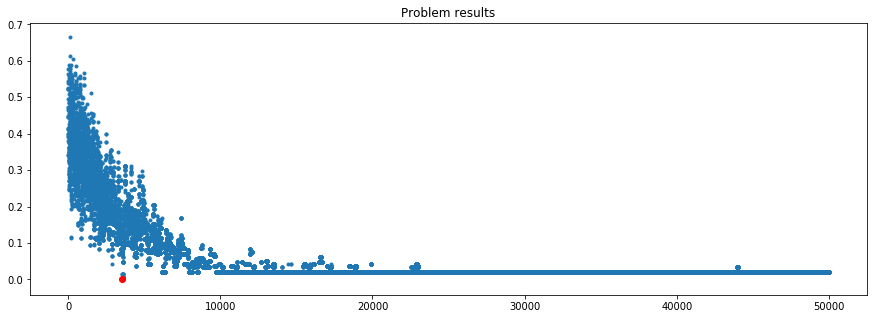

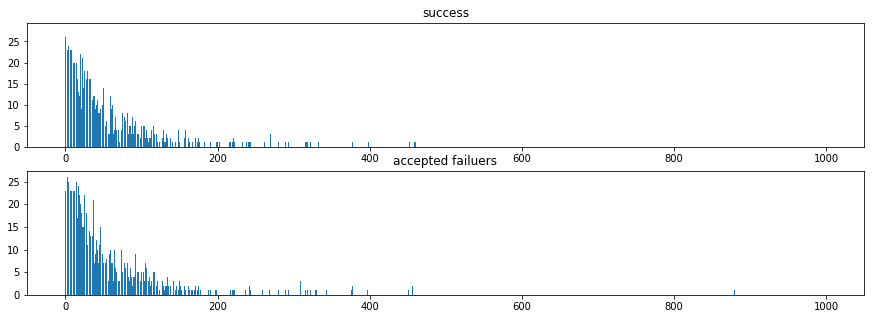

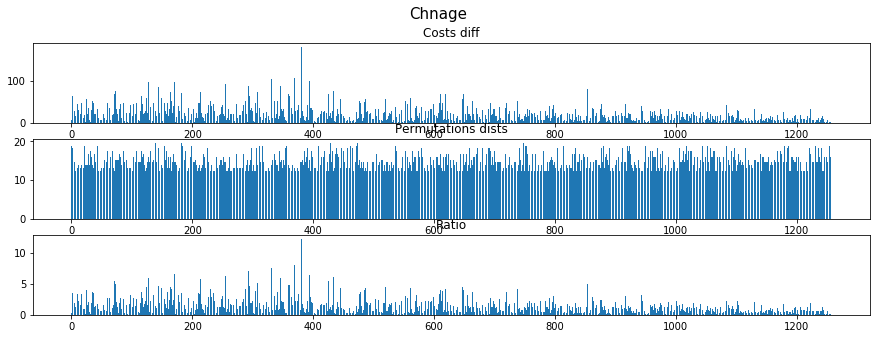

In [134]:
kwargs = {
    **prepare_data(12),
    'T': 50000,
    'radius': 1,
    'alpha': 1.0,
}
data = simulated_annealing(**kwargs)
%time
show_data(*(data + (kwargs,)))

Problem size: 14
Flow matrix:
 [[ 0.  1.  2.  3.  4.  1.  2.  3.  4.  5.  2.  3.  4.  5.]
 [ 1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.  4.]
 [ 2.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.]
 [ 3.  2.  1.  0.  1.  4.  3.  2.  1.  2.  5.  4.  3.  2.]
 [ 4.  3.  2.  1.  0.  5.  4.  3.  2.  1.  6.  5.  4.  3.]
 [ 1.  2.  3.  4.  5.  0.  1.  2.  3.  4.  1.  2.  3.  4.]
 [ 2.  1.  2.  3.  4.  1.  0.  1.  2.  3.  2.  1.  2.  3.]
 [ 3.  2.  1.  2.  3.  2.  1.  0.  1.  2.  3.  2.  1.  2.]
 [ 4.  3.  2.  1.  2.  3.  2.  1.  0.  1.  4.  3.  2.  1.]
 [ 5.  4.  3.  2.  1.  4.  3.  2.  1.  0.  5.  4.  3.  2.]
 [ 2.  3.  4.  5.  6.  1.  2.  3.  4.  5.  0.  1.  2.  3.]
 [ 3.  2.  3.  4.  5.  2.  1.  2.  3.  4.  1.  0.  1.  2.]
 [ 4.  3.  2.  3.  4.  3.  2.  1.  2.  3.  2.  1.  0.  1.]
 [ 5.  4.  3.  2.  3.  4.  3.  2.  1.  2.  3.  2.  1.  0.]]
Distance matrix:
 [[  0.  10.   0.   5.   1.   0.   1.   2.   2.   2.   2.   0.   4.   0.]
 [ 10.   0.   1.   3.   2.   2.   2.   3.   2.   0.

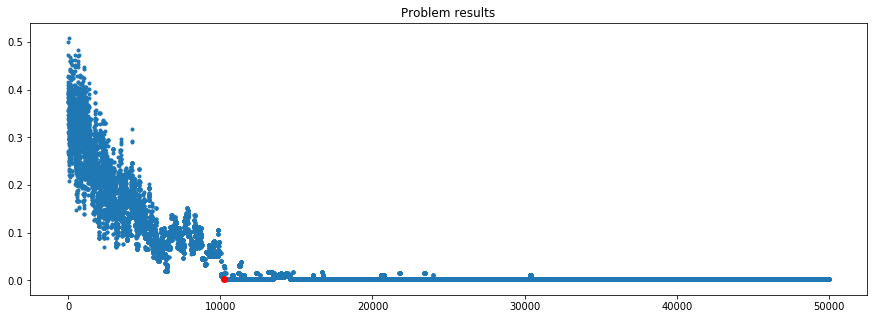

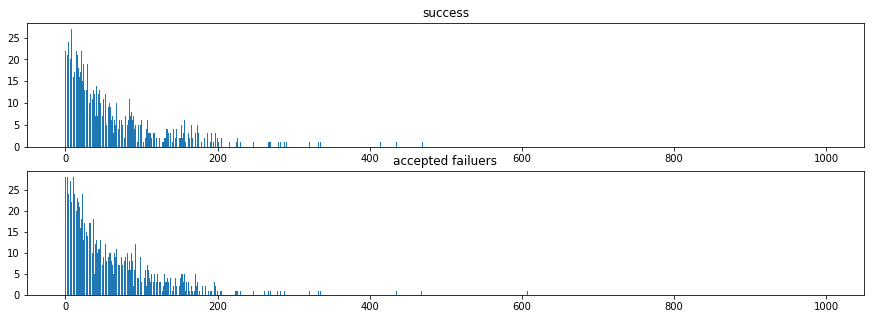

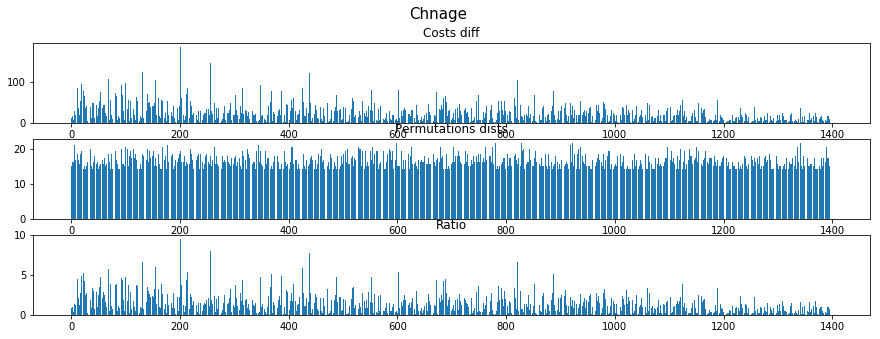

In [135]:
kwargs = {
    **prepare_data(14),
    'T': 50000,
    'radius': 1,
    'alpha': 0.8,
}
data = simulated_annealing(**kwargs)
%time

show_data(*(data + (kwargs,)))

Problem size: 15
Flow matrix:
 [[ 0.  1.  2.  3.  4.  1.  2.  3.  4.  5.  2.  3.  4.  5.  6.]
 [ 1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.  4.  5.]
 [ 2.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.  4.]
 [ 3.  2.  1.  0.  1.  4.  3.  2.  1.  2.  5.  4.  3.  2.  3.]
 [ 4.  3.  2.  1.  0.  5.  4.  3.  2.  1.  6.  5.  4.  3.  2.]
 [ 1.  2.  3.  4.  5.  0.  1.  2.  3.  4.  1.  2.  3.  4.  5.]
 [ 2.  1.  2.  3.  4.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.]
 [ 3.  2.  1.  2.  3.  2.  1.  0.  1.  2.  3.  2.  1.  2.  3.]
 [ 4.  3.  2.  1.  2.  3.  2.  1.  0.  1.  4.  3.  2.  1.  2.]
 [ 5.  4.  3.  2.  1.  4.  3.  2.  1.  0.  5.  4.  3.  2.  1.]
 [ 2.  3.  4.  5.  6.  1.  2.  3.  4.  5.  0.  1.  2.  3.  4.]
 [ 3.  2.  3.  4.  5.  2.  1.  2.  3.  4.  1.  0.  1.  2.  3.]
 [ 4.  3.  2.  3.  4.  3.  2.  1.  2.  3.  2.  1.  0.  1.  2.]
 [ 5.  4.  3.  2.  3.  4.  3.  2.  1.  2.  3.  2.  1.  0.  1.]
 [ 6.  5.  4.  3.  2.  5.  4.  3.  2.  1.  4.  3.  2.  1.  0.]]
Distance matrix:
 [[  0

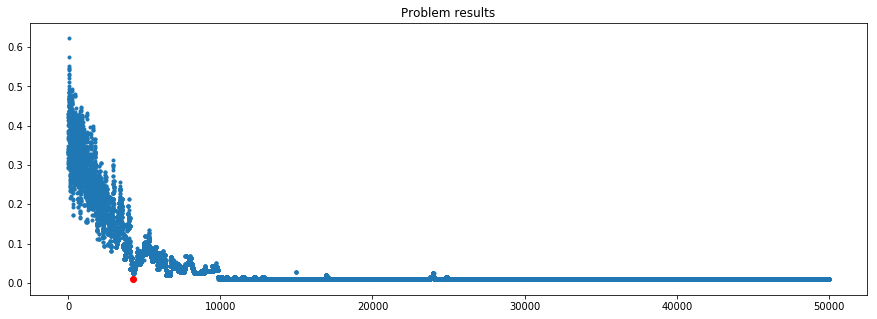

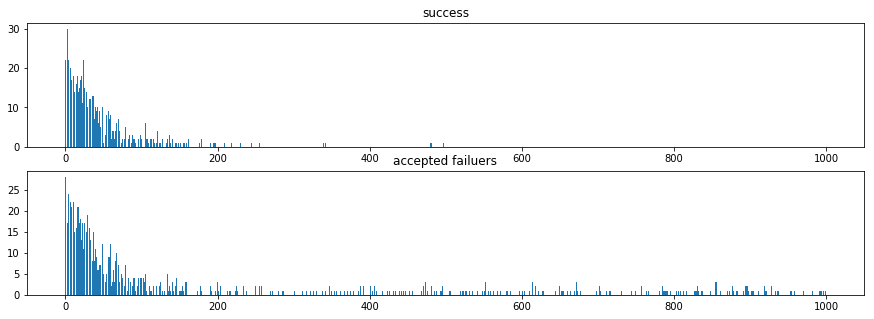

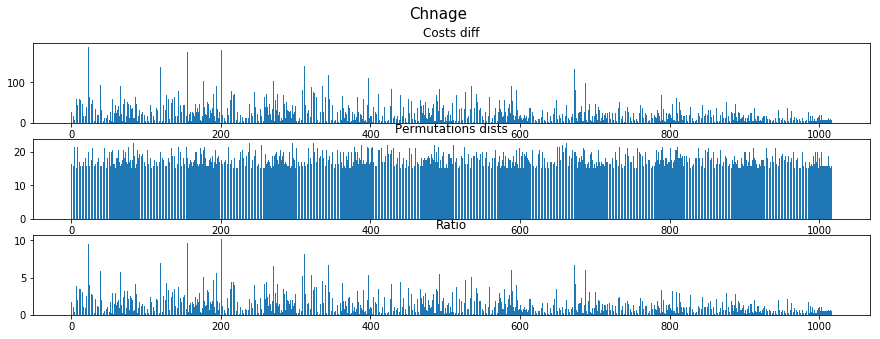

In [136]:
kwargs = {
    **prepare_data(15),
    'T': 50000,
    'radius': 1,
    'alpha': 1.0,
}
data = simulated_annealing(**kwargs)
%time
show_data(*(data + (kwargs,)))

Problem size: 17
Flow matrix:
 [[ 0.  1.  2.  3.  4.  1.  2.  3.  4.  5.  2.  3.  4.  5.  6.  3.  4.]
 [ 1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.  4.  5.  4.  3.]
 [ 2.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.  4.  5.  4.]
 [ 3.  2.  1.  0.  1.  4.  3.  2.  1.  2.  5.  4.  3.  2.  3.  6.  5.]
 [ 4.  3.  2.  1.  0.  5.  4.  3.  2.  1.  6.  5.  4.  3.  2.  7.  6.]
 [ 1.  2.  3.  4.  5.  0.  1.  2.  3.  4.  1.  2.  3.  4.  5.  2.  3.]
 [ 2.  1.  2.  3.  4.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.]
 [ 3.  2.  1.  2.  3.  2.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.]
 [ 4.  3.  2.  1.  2.  3.  2.  1.  0.  1.  4.  3.  2.  1.  2.  5.  4.]
 [ 5.  4.  3.  2.  1.  4.  3.  2.  1.  0.  5.  4.  3.  2.  1.  6.  5.]
 [ 2.  3.  4.  5.  6.  1.  2.  3.  4.  5.  0.  1.  2.  3.  4.  1.  2.]
 [ 3.  2.  3.  4.  5.  2.  1.  2.  3.  4.  1.  0.  1.  2.  3.  2.  1.]
 [ 4.  3.  2.  3.  4.  3.  2.  1.  2.  3.  2.  1.  0.  1.  2.  3.  2.]
 [ 5.  4.  3.  2.  3.  4.  3.  2.  1.  2.  3. 

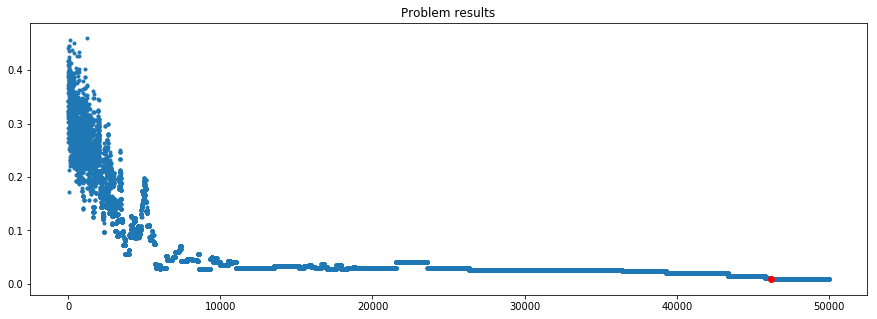

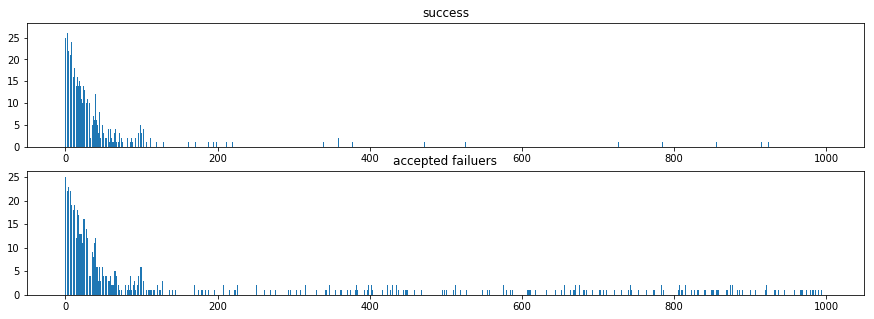

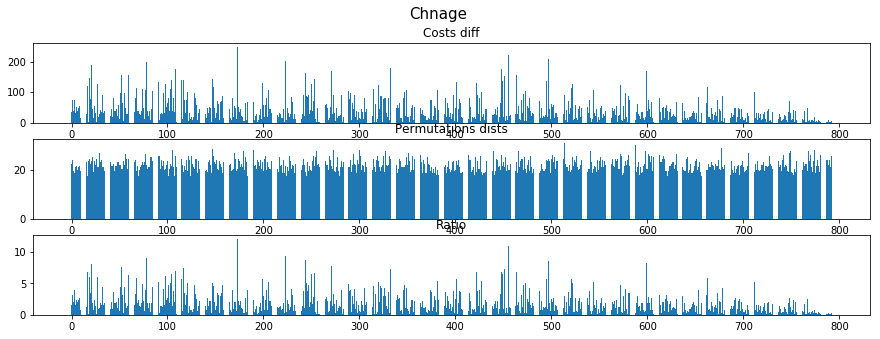

In [137]:
kwargs = {
    **prepare_data(17),
    'T': 50000,
    'radius': 2,
    'alpha': 0.7,
}
data = simulated_annealing(**kwargs)
%time
show_data(*(data + (kwargs,)))

Problem size: 18
Flow matrix:
 [[ 0.  1.  2.  3.  4.  1.  2.  3.  4.  5.  2.  3.  4.  5.  6.  3.  4.  5.]
 [ 1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.  4.  5.  4.  3.  4.]
 [ 2.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.  4.  5.  4.  3.]
 [ 3.  2.  1.  0.  1.  4.  3.  2.  1.  2.  5.  4.  3.  2.  3.  6.  5.  4.]
 [ 4.  3.  2.  1.  0.  5.  4.  3.  2.  1.  6.  5.  4.  3.  2.  7.  6.  5.]
 [ 1.  2.  3.  4.  5.  0.  1.  2.  3.  4.  1.  2.  3.  4.  5.  2.  3.  4.]
 [ 2.  1.  2.  3.  4.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.]
 [ 3.  2.  1.  2.  3.  2.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.]
 [ 4.  3.  2.  1.  2.  3.  2.  1.  0.  1.  4.  3.  2.  1.  2.  5.  4.  3.]
 [ 5.  4.  3.  2.  1.  4.  3.  2.  1.  0.  5.  4.  3.  2.  1.  6.  5.  4.]
 [ 2.  3.  4.  5.  6.  1.  2.  3.  4.  5.  0.  1.  2.  3.  4.  1.  2.  3.]
 [ 3.  2.  3.  4.  5.  2.  1.  2.  3.  4.  1.  0.  1.  2.  3.  2.  1.  2.]
 [ 4.  3.  2.  3.  4.  3.  2.  1.  2.  3.  2.  1.  0.  1.  2.  3.  2.

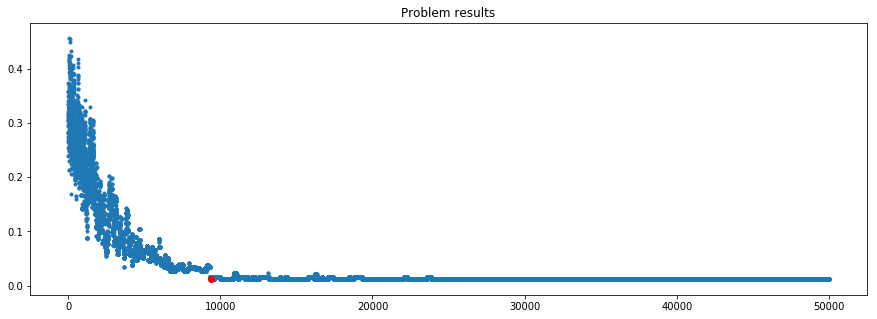

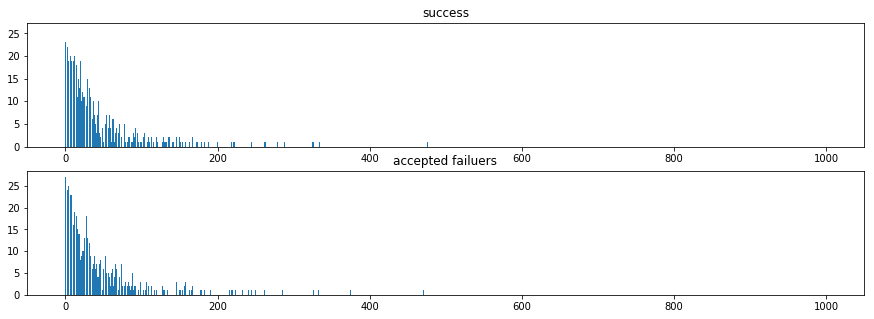

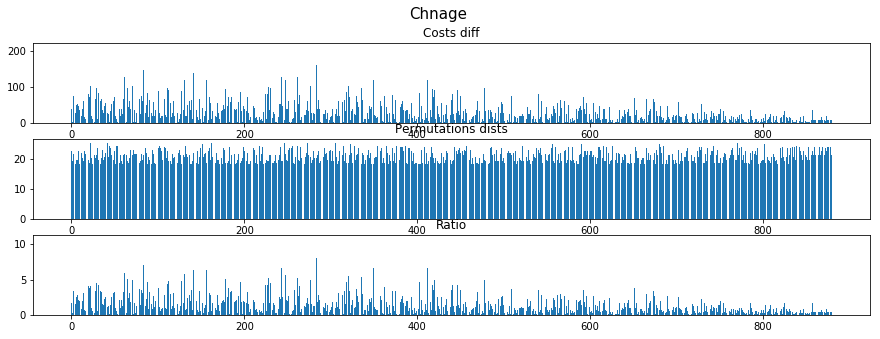

In [138]:
kwargs = {
    **prepare_data(18),
    'T': 50000,
    'radius': 1,
    'alpha': 1.0,
}
data = simulated_annealing(**kwargs)
%time
show_data(*(data + (kwargs,)))

# Hist for pbil

In [140]:
tries = 1000
hist_data = np.zeros(tries)
nug = 14
A, B = get_data(nug)

T = 30000
radius = 1
alpha = 1.0
for i in range(tries):
    print("\nT = ",i)
    costs = sa(T, radius, alpha, A, B, nug)[0]
    hist_data[i] = np.min(costs)

Problem size: 14
Flow matrix:
 [[ 0.  1.  2.  3.  4.  1.  2.  3.  4.  5.  2.  3.  4.  5.]
 [ 1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.  4.]
 [ 2.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.]
 [ 3.  2.  1.  0.  1.  4.  3.  2.  1.  2.  5.  4.  3.  2.]
 [ 4.  3.  2.  1.  0.  5.  4.  3.  2.  1.  6.  5.  4.  3.]
 [ 1.  2.  3.  4.  5.  0.  1.  2.  3.  4.  1.  2.  3.  4.]
 [ 2.  1.  2.  3.  4.  1.  0.  1.  2.  3.  2.  1.  2.  3.]
 [ 3.  2.  1.  2.  3.  2.  1.  0.  1.  2.  3.  2.  1.  2.]
 [ 4.  3.  2.  1.  2.  3.  2.  1.  0.  1.  4.  3.  2.  1.]
 [ 5.  4.  3.  2.  1.  4.  3.  2.  1.  0.  5.  4.  3.  2.]
 [ 2.  3.  4.  5.  6.  1.  2.  3.  4.  5.  0.  1.  2.  3.]
 [ 3.  2.  3.  4.  5.  2.  1.  2.  3.  4.  1.  0.  1.  2.]
 [ 4.  3.  2.  3.  4.  3.  2.  1.  2.  3.  2.  1.  0.  1.]
 [ 5.  4.  3.  2.  3.  4.  3.  2.  1.  2.  3.  2.  1.  0.]]
Distance matrix:
 [[  0.  10.   0.   5.   1.   0.   1.   2.   2.   2.   2.   0.   4.   0.]
 [ 10.   0.   1.   3.   2.   2.   2.   3.   2.   0.


T =  267
0
10000
20000

T =  268
0
10000
20000

T =  269
0
10000
20000

T =  270
0
10000
20000

T =  271
0
10000
20000

T =  272
0
10000
20000

T =  273
0
10000
20000

T =  274
0
10000
20000

T =  275
0
10000
20000

T =  276
0
10000
20000

T =  277
0
10000
20000

T =  278
0
10000
20000

T =  279
0
10000
20000

T =  280
0
10000
20000

T =  281
0
10000
20000

T =  282
0
10000
20000

T =  283
0
10000
20000

T =  284
0
10000
20000

T =  285
0
10000
20000

T =  286
0
10000
20000

T =  287
0
10000
20000

T =  288
0
10000
20000

T =  289
0
10000
20000

T =  290
0
10000
20000

T =  291
0
10000
20000

T =  292
0
10000
20000

T =  293
0
10000
20000

T =  294
0
10000
20000

T =  295
0
10000
20000

T =  296
0
10000
20000

T =  297
0
10000
20000

T =  298
0
10000
20000

T =  299
0
10000
20000

T =  300
0
10000
20000

T =  301
0
10000
20000

T =  302
0
10000
20000

T =  303
0
10000
20000

T =  304
0
10000
20000

T =  305
0
10000
20000

T =  306
0
10000
20000

T =  307
0
10000
20000

T =  308
0
1000

10000
20000

T =  609
0
10000
20000

T =  610
0
10000
20000

T =  611
0
10000
20000

T =  612
0
10000
20000

T =  613
0
10000
20000

T =  614
0
10000
20000

T =  615
0
10000
20000

T =  616
0
10000
20000

T =  617
0
10000
20000

T =  618
0
10000
20000

T =  619
0
10000
20000

T =  620
0
10000
20000

T =  621
0
10000
20000

T =  622
0
10000
20000

T =  623
0
10000
20000

T =  624
0
10000
20000

T =  625
0
10000
20000

T =  626
0
10000
20000

T =  627
0
10000
20000

T =  628
0
10000
20000

T =  629
0
10000
20000

T =  630
0
10000
20000

T =  631
0
10000
20000

T =  632
0
10000
20000

T =  633
0
10000
20000

T =  634
0
10000
20000

T =  635
0
10000
20000

T =  636
0
10000
20000

T =  637
0
10000
20000

T =  638
0
10000
20000

T =  639
0
10000
20000

T =  640
0
10000
20000

T =  641
0
10000
20000

T =  642
0
10000
20000

T =  643
0
10000
20000

T =  644
0
10000
20000

T =  645
0
10000
20000

T =  646
0
10000
20000

T =  647
0
10000
20000

T =  648
0
10000
20000

T =  649
0
10000
20000

T =


T =  950
0
10000
20000

T =  951
0
10000
20000

T =  952
0
10000
20000

T =  953
0
10000
20000

T =  954
0
10000
20000

T =  955
0
10000
20000

T =  956
0
10000
20000

T =  957
0
10000
20000

T =  958
0
10000
20000

T =  959
0
10000
20000

T =  960
0
10000
20000

T =  961
0
10000
20000

T =  962
0
10000
20000

T =  963
0
10000
20000

T =  964
0
10000
20000

T =  965
0
10000
20000

T =  966
0
10000
20000

T =  967
0
10000
20000

T =  968
0
10000
20000

T =  969
0
10000
20000

T =  970
0
10000
20000

T =  971
0
10000
20000

T =  972
0
10000
20000

T =  973
0
10000
20000

T =  974
0
10000
20000

T =  975
0
10000
20000

T =  976
0
10000
20000

T =  977
0
10000
20000

T =  978
0
10000
20000

T =  979
0
10000
20000

T =  980
0
10000
20000

T =  981
0
10000
20000

T =  982
0
10000
20000

T =  983
0
10000
20000

T =  984
0
10000
20000

T =  985
0
10000
20000

T =  986
0
10000
20000

T =  987
0
10000
20000

T =  988
0
10000
20000

T =  989
0
10000
20000

T =  990
0
10000
20000

T =  991
0
1000

(array([  73.,    0.,  152.,    0.,    0.,  146.,    0.,    0.,    7.,
           0.,    0.,    8.,    0.,    0.,   41.,    0.,   38.,    0.,
           0.,   62.,    0.,    0.,  107.,    0.,    0.,   10.,    0.,
           0.,  135.,    0.,   15.,    0.,    0.,   50.,    0.,    0.,
           5.,    0.,    0.,   61.,    0.,    0.,   10.,    0.,   29.,
           0.,    0.,   13.,    0.,    0.,   18.,    0.,    0.,    6.,
           0.,    0.,    4.,    0.,    6.,    0.,    0.,    3.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ 1014.        ,  1014.71428571,  1015.42857143,  1016.14285714,
         1016.85714286,  1017.57142857,  1018.28571429,  1019.        ,
         1019.71428571,  1020.42857143,  1021.14285714,  1021.85714286,
         1022.57142857,  1023.28571429,  1024.        ,  1024.71428571,
         1025.42857143,  1026.14285714,  1026.85714286,  1027.57142857,
         1028.28571429,  1029.        ,  1029.71428571,  1030.42857143,
         103

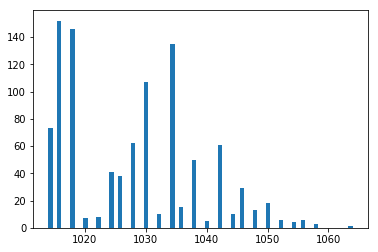

In [145]:
plt.hist(hist_data, bins=70)